In [491]:
from sklearn.datasets import load_svmlight_file
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from matplotlib import pyplot as plt
from sklearn import model_selection
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.linear_model import LogisticRegression as sk_LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn import neighbors
from sklearn.neighbors import KNeighborsClassifier
from sklearn import preprocessing
from sklearn.metrics import accuracy_score
import random

## IMDb Score

#### Import Dataset

In [241]:
x_train,y_train = load_svmlight_file(r"aclImdb\train\labeledBow.feat", dtype = "uint8")
x_test, y_test = load_svmlight_file(r"aclImdb\test\labeledBow.feat", dtype = "uint8")

In [242]:
x_train = x_train.toarray()
x_test = x_test.toarray()

In [243]:
names=[]
for i in range(0,89527):
    names.append(str(i))
counts_df=pd.DataFrame(x_train,columns=names)
counts_df

,0,1,2,3,4,5,6,7,8,9,...,89517,89518,89519,89520,89521,89522,89523,89524,89525,89526
0,9,1,4,4,6,4,2,2,4,0,...,0,0,0,0,0,0,0,0,0,0
1,7,4,2,2,0,4,1,0,2,2,...,0,0,0,0,0,0,0,0,0,0
2,4,4,4,7,2,1,1,1,0,1,...,0,0,0,0,0,0,0,0,0,0
3,10,2,2,0,3,2,4,2,0,1,...,0,0,0,0,0,0,0,0,0,0
4,13,9,6,4,2,5,10,6,0,2,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24995,36,16,18,15,11,8,4,11,8,8,...,0,0,0,0,0,0,0,0,0,0
24996,4,8,8,3,3,0,6,3,2,3,...,0,0,0,0,0,0,0,0,0,0
24997,17,6,7,5,1,2,2,2,2,1,...,0,0,0,0,0,0,0,0,0,0
24998,15,8,3,6,0,6,2,3,0,2,...,0,0,0,0,0,0,0,0,0,0


In [244]:
# Fill out test dataset features
names=[]
for i in range(0,89523):
    names.append(str(i))
test_df = pd.DataFrame(x_test,columns=names)
zero_list=[0]*25000
test_df["89523"]=zero_list
test_df["89524"]=zero_list
test_df["89525"]=zero_list
test_df["89526"]=zero_list
test_df

,0,1,2,3,4,5,6,7,8,9,...,89517,89518,89519,89520,89521,89522,89523,89524,89525,89526
0,7,4,2,5,5,1,3,1,6,3,...,0,0,0,0,0,0,0,0,0,0
1,9,4,4,0,3,1,10,1,12,1,...,0,0,0,0,0,0,0,0,0,0
2,21,7,4,5,7,8,0,5,8,4,...,0,0,0,0,0,0,0,0,0,0
3,13,5,8,8,4,2,6,4,8,2,...,0,0,0,0,0,0,0,0,0,0
4,4,1,2,1,3,2,3,2,4,4,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24995,26,0,10,10,10,11,12,9,4,0,...,0,0,0,0,0,0,0,0,0,0
24996,10,5,6,3,1,6,1,2,0,2,...,0,0,0,0,0,0,0,0,0,0
24997,25,0,10,5,4,5,1,3,0,1,...,0,0,0,0,0,0,0,0,0,0
24998,10,4,2,5,3,2,2,2,2,2,...,0,0,0,0,0,0,0,0,0,0


#### Select Features

##### Remove Stopwords

In [245]:
n_zeros = np.count_nonzero(x_train==0, axis=0)

fr_zeros = n_zeros/x_train.shape[0]
fr_zeros = 1 - fr_zeros
print(fr_zeros)

[9.9168e-01 9.6648e-01 9.6692e-01 ... 4.0000e-05 4.0000e-05 4.0000e-05]


In [246]:
preserve = []
for i in range(0,89527):
    frequency = fr_zeros[i]
    if frequency >= 0.01 and frequency <= 0.50 :
        preserve.append(str(i))

In [247]:
len(preserve)

1744

##### Calculate Z-score

In [248]:
subset = counts_df[preserve]

In [249]:
subset_index_list=subset.columns

In [250]:
N = np.sqrt(25000)

In [251]:
#Standardize Matrix
matrix = subset.to_numpy()
scaler = StandardScaler()
matrix_std=scaler.fit_transform(matrix)
matrix_std

array([[-0.51052561, -0.52956027,  0.01393489, ..., -0.09890166,
        -0.09885382, -0.09922151],
       [-0.51052561, -0.52956027,  0.01393489, ..., -0.09890166,
        -0.09885382, -0.09922151],
       [-0.51052561, -0.52956027,  0.01393489, ..., -0.09890166,
        -0.09885382, -0.09922151],
       ...,
       [-0.51052561,  0.37227943, -0.3512353 , ...,  9.44759078,
        -0.09885382, -0.09922151],
       [-0.51052561, -0.07864042,  0.01393489, ..., -0.09890166,
        -0.09885382, -0.09922151],
       [-0.51052561, -0.52956027,  0.01393489, ..., -0.09890166,
        -0.09885382, -0.09922151]])

In [252]:
z_list=np.dot(matrix_std.T, y_train)/N
z_list

array([ 21.6879433 ,  47.57525553, -10.26418082, ...,   7.44274358,
        -1.44588364,  14.60329977])

In [253]:
combined = zip(z_list, preserve)
z_list_abs = np.absolute(z_list)
#combined2 = zip(z_list_abs, preserve)
words = []
zscores = []
for (a,b) in tuple(combined):
    if a < -2.58 or a > 2.58:
        words.append(b)
        zscores.append(a)
len(words)      

1533

In [254]:
sorted_combined = sorted(zip(zscores, words))
sorted_abs_combined = sorted(zip(np.absolute(zscores), words),reverse=True)
#print(sorted_abs_combined)
features_ranked= [x for _, x in sorted_abs_combined]
#print(features_ranked)
features_selected=features_ranked[0:1000]

##### read the vocabulary

In [255]:
vocab=pd.read_csv("aclImdb\imdb.vocab", names = ["words"], header = None)


##### find top 20 features (10 most positive and 10 most negative)

In [256]:
most_neg = tuple(sorted_combined)[0:10]
most_pos = tuple(sorted_combined)[-10:]
fea_names = []
most_z_list = []
for(z,ind) in most_neg:
    fea_names.append(vocab.loc[int(ind), "words"])
    most_z_list.append(z)
for(z,ind) in most_pos:
    fea_names.append(vocab.loc[int(ind), "words"])
    most_z_list.append(z)

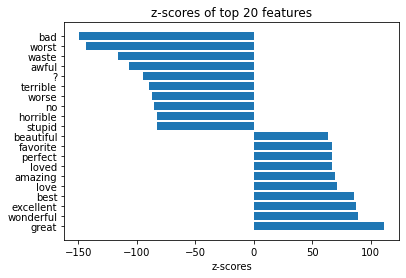

In [257]:
fig, ax = plt.subplots()
ypos = np.arange(20)
ax.barh(ypos, most_z_list)
ax.set_yticks(ypos, labels=fea_names)
ax.invert_yaxis()  # labels read top-to-bottom
ax.set_xlabel('z-scores')
ax.set_title('z-scores of top 20 features')
plt.savefig("z-scores of top 20 features.png", bbox_inches="tight", dpi=300)

In [258]:
features_selected_str = []
for ind in features_selected:
    features_selected_str.append(vocab.loc[int(ind), "words"])

In [259]:
new_counts_df = counts_df[features_selected]
x_train = new_counts_df.to_numpy()
x_test = test_df[features_selected].to_numpy()

In [260]:
# standardize data
x_train = StandardScaler().fit(x_train).transform(x_train)
x_test = StandardScaler().fit(x_test).transform(x_test)

In [261]:
#transform the review score to binary
y_train = (y_train >= 7).astype(int)
y_test = (y_test >= 7).astype(int)

### Construct Logistics Regression

In [262]:
logistic = lambda z: 1./ (1 + np.exp(-z))

In [263]:
def cost_fn(x, y, w):
    N, D = x.shape                                                       
    z = np.dot(x, w)
    J = np.mean(y * np.log1p(np.exp(-z)) + (1-y) * np.log1p(np.exp(z)))  #log1p calculates log(1+x) to remove floating point inaccuracies 
    return J

In [264]:
class LogisticRegression:
    
    def __init__(self, add_bias=True, learning_rate=.1, epsilon=1e-4, max_iters=1e3, verbose=False):
        self.add_bias = add_bias
        self.learning_rate = learning_rate
        self.epsilon = epsilon                        #to get the tolerance for the norm of gradients 
        self.max_iters = max_iters                    #maximum number of iteration of gradient descent
        self.verbose = verbose

    def gradient(self, x, y):
        N,D = x.shape
        yh = logistic(np.dot(x, self.w))    # predictions  size N
        grad = np.dot(x.T, yh - y)/N        # divide by N because cost is mean over N points
        return grad
        
    def fit(self, x, y):
        if x.ndim == 1:
            x = x[:, None]
        if self.add_bias:
            N = x.shape[0]
            x = np.column_stack([x,np.ones(N)])
        N,D = x.shape
        self.w = np.zeros(D)
        g = np.inf 
        t = 0
        # the code snippet below is for gradient descent
        while np.linalg.norm(g) > self.epsilon and t < self.max_iters:
            g = self.gradient(x, y)
            self.w = self.w - self.learning_rate * g 
            t += 1
        
        if self.verbose:
            print(f'terminated after {t} iterations, with norm of the gradient equal to {np.linalg.norm(g)}')
            print(f'the weight found: {self.w}')
        return self
    
    def predict(self, x):
        if x.ndim == 1:
            x = x[:, None]
        Nt = x.shape[0]
        if self.add_bias:
            x = np.column_stack([x,np.ones(Nt)])
        yh = logistic(np.dot(x,self.w))            #predict output
        return yh

In [265]:
model = LogisticRegression(verbose=False, add_bias=False)

In [266]:
fit = model.fit(x_train,y_train)

terminated after 1000 iterations, with norm of the gradient equal to 0.0021780764970582584
the weight found: [-3.46730598e-01 -4.92767499e-01 -3.96831910e-01  4.22626917e-01
 -3.45130362e-01 -2.91952732e-01 -2.21393842e-01  2.17306150e-01
  3.49410975e-01 -2.31177321e-01  2.81574565e-01 -1.72569584e-01
 -2.33850787e-01 -1.47858799e-01 -2.73341098e-01 -1.00159689e-01
 -1.48945266e-01 -1.80142938e-01 -2.31943160e-01  1.50974133e-01
 -1.39741413e-01  2.39964582e-01 -1.87432132e-01 -5.27922942e-02
 -1.41669982e-01  2.03054879e-01  2.52642143e-01  2.21159791e-01
 -1.73765004e-01 -1.12275721e-01 -1.13689620e-01 -7.33028766e-02
 -2.76870257e-01  1.33286773e-01 -1.45103212e-01  1.95498334e-01
 -1.77964152e-01 -2.24238568e-02 -1.34570467e-01  1.63065945e-01
  1.87687049e-01  1.51683483e-01 -3.12056570e-02 -1.23073557e-01
 -1.38833294e-01  1.17927482e-01 -2.23766644e-01 -1.34781073e-02
 -1.02460089e-01 -1.30751067e-01 -1.85026449e-01 -1.78122569e-01
 -1.90137927e-01  7.89566291e-02 -1.68248780e-

In [267]:
effect_size = pd.DataFrame(fit.w[:(len(fit.w))]).transpose() # linear coefficents

In [268]:
y_train_pred = fit.predict(x_train)
y_test_pred = fit.predict(x_test)

In [269]:
y_train_pred = (y_train_pred > 0.5).astype(int)
y_test_pred = (y_test_pred > 0.5).astype(int)

In [270]:
# accuracy = correctly classified / total classified
acc_train = sum(y_train_pred==y_train)/len(y_train)
acc_test = sum(y_test_pred==y_test)/len(y_test)
print(f"train accuracy: {acc_train:.3f}; test accuracy: {acc_test:.3f}")

train accuracy: 0.888; test accuracy: 0.867


In [271]:
effect_size.columns = features_selected_str
effect_size

,bad,worst,waste,great,awful,?,terrible,wonderful,excellent,worse,...,element,particularly,those,!,people,here,creative,average,leads,inside
0,-0.346731,-0.492767,-0.396832,0.422627,-0.34513,-0.291953,-0.221394,0.217306,0.349411,-0.231177,...,0.009282,-0.05525,0.00994,0.113681,0.040088,-0.063791,0.029992,0.009271,-0.001065,0.002849


In [272]:
coef = effect_size.to_numpy()[0]

In [273]:
sorted_coef = sorted(zip(coef, features_selected_str))
neg = tuple(sorted_coef)[0:10]
pos = tuple(sorted_coef)[-10:]
top_coefs = []
top_words = []
for (coef, word) in neg:
    top_coefs.append(coef)
    top_words.append(word)
for (coef, word) in pos:
    top_coefs.append(coef)
    top_words.append(word)

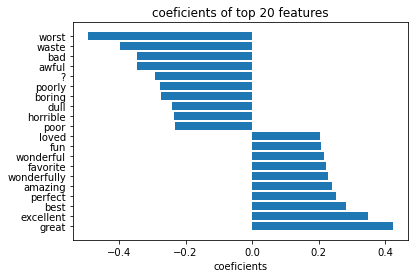

In [274]:
fig, ax = plt.subplots()
ypos = np.arange(20)
ax.barh(ypos, top_coefs)
ax.set_yticks(ypos, labels=top_words)
ax.invert_yaxis()  # labels read top-to-bottom
ax.set_xlabel('coeficients')
ax.set_title('coeficients of top 20 features')
plt.savefig("coeficients of top 20 features.png", bbox_inches="tight", dpi=300)

### Verifying gradient calculation 1: small perturbation

In [230]:
def gradient(self, x, y):
    N,D = x.shape
    yh = logistic(np.dot(x, self.w))    # predictions  size N
    grad = np.dot(x.T, yh - y)/N        # divide by N because cost is mean over N points
    return grad                         # size D

In [231]:
# check gredient decent
x = x_train
y = y_train

# small perturbation
w = np.random.randn(1)
w0 = w
epsilon = np.random.randn(1)[0] * 1e-5
w1 = w0 + epsilon
w2 = w0 - epsilon
a1 = w1*x
a2 = w2*x
# broadcast
if x.ndim == 1:
    x = x[:, None]
else:
    y = y[:,None]

ce1 = np.sum(y * np.log1p(np.exp(-a1)) + (1-y) * np.log1p(np.exp(a1)))
ce2 = np.sum(y * np.log1p(np.exp(-a2)) + (1-y) * np.log1p(np.exp(a2)))
dw_num = (ce1 - ce2)/(2*epsilon) # approximated gradient

yh = 1/(1+np.exp(-x * w))
dw_cal = np.sum((yh - y) * x) # hand calculated gradient

print(dw_cal)
print(dw_num)
print((dw_cal - dw_num)**2/(dw_cal + dw_num)**2)

-420969.0157218952
-420969.012155628
1.7941861810281037e-17


### Verifying gradient calculation 2: monitor loss at each iteration

C:\Users\liuru\AppData\Local\Temp\ipykernel_7748\3424420402.py:12: RuntimeWarning: overflow encountered in exp
  ce_all[i] = np.sum(y * np.log1p(np.exp(-a)) + (1-y) * np.log1p(np.exp(a))) # cross-entropy
C:\Users\liuru\AppData\Local\Temp\ipykernel_7748\3424420402.py:12: RuntimeWarning: invalid value encountered in multiply
  ce_all[i] = np.sum(y * np.log1p(np.exp(-a)) + (1-y) * np.log1p(np.exp(a))) # cross-entropy
C:\Users\liuru\AppData\Local\Temp\ipykernel_7748\3424420402.py:13: RuntimeWarning: overflow encountered in exp
  y_hat = 1 / (1 + np.exp(-a))


<Figure size 432x288 with 0 Axes>

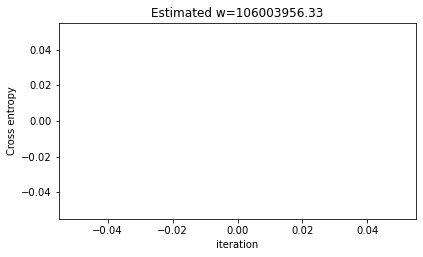

In [456]:
# monitor loss
x = x_train
y = y_train
y = y[:,None]
lr = 0.1
niter = 100
ce_all = np.zeros(niter)
w = np.full((1000,1), fill_value = np.random.randn(1))
w0 = w
for i in range(niter):
    a = np.dot(x, w)
    ce_all[i] = np.sum(y * np.log1p(np.exp(-a)) + (1-y) * np.log1p(np.exp(a))) # cross-entropy
    y_hat = 1 / (1 + np.exp(-a))
    dw = np.sum((y_hat - y) * x)
    w = w - lr * dw

plt.clf()
plt.figure(figsize=((16/9)*3.6,3.6))
plt.plot(ce_all)
plt.ylabel("Cross entropy")
plt.xlabel("iteration")
# plt.title(f"True w={w_true}; Estimated w={round(w.astype(float)[0],2)}")
plt.title(f"Estimated w={round(np.sum(w),2)}")
# plt.show()
plt.savefig('ce_iteration.png', bbox_inches="tight", dpi=300)

### Implement KNN on IMDb Score

In [30]:
clf=neighbors.KNeighborsClassifier(n_neighbors=5,metric='euclidean').fit(x_train,y_train)
trained_model=clf.fit(x_train,y_train)
trained_model.score(x_train,y_train)
from sklearn.metrics import accuracy_score
y_pred=trained_model.predict(x_test)
test_accuracy=accuracy_score(y_test, y_pred)
print(test_accuracy)

0.67184


### ROC-curve

In [31]:
models = [KNeighborsClassifier(),
          sk_LogisticRegression()]

perf = {}

knnscore = 0

# our implementation is slow you may try sklearn version
logitreg = LogisticRegression(max_iters=1e3)
fit = logitreg.fit(x_train, y_train)
y_test_prob = fit.predict(x_test)
fpr, tpr, _ = roc_curve(y_test, y_test_prob)
auroc = roc_auc_score(y_test, y_test_prob)
rscore = auroc
perf["LogisticRegression (ours)"] = {'fpr':fpr, 'tpr':tpr, 'auroc':auroc}

for model in models:
    fit = model.fit(x_train, y_train)
    y_test_prob = fit.predict_proba(x_test)[:,1]
    fpr, tpr, _ = roc_curve(y_test, y_test_prob)
    auroc = roc_auc_score(y_test, y_test_prob)
    if type(model).__name__ == "KNeighborsClassifier":
        knnscore = auroc
    if type(model).__name__ == "LogisticRegression":
        perf["LogisticRegression (sklearn)"] = {'fpr':fpr,'tpr':tpr,'auroc':auroc}
    else:
        perf[type(model).__name__] = {'fpr':fpr,'tpr':tpr,'auroc':auroc}

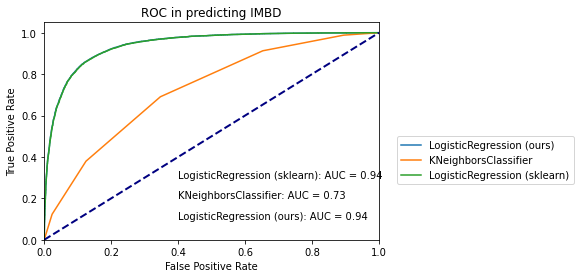

In [32]:
plt.clf()
i = 0
for model_name, model_perf in perf.items():
    plt.plot(model_perf['fpr'], model_perf['tpr'],label=model_name)
    plt.text(0.4, i+0.1, model_name + ': AUC = '+ str(round(model_perf['auroc'],2)))
    i += 0.1

plt.plot([0, 1], [0, 1], color="navy", lw=2, linestyle="--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])

plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title('ROC in predicting IMBD')
plt.legend(bbox_to_anchor=(1.04, 0.5), loc="upper left")
# plt.show()
plt.savefig("roc_curve.png", bbox_inches='tight', dpi=300)
# plt.close()

### Test on data size 

In [33]:
# x_train_new, _, y_train_new, _ = model_selection.train_test_split(
#     x_train, y_train, train_size = 0.8, random_state= 1, stratify=y_train)
# lr = sk_LogisticRegression()
# fitted = lr.fit(x_train_new, y_train_new)
# prediction = fitted.predict(x_test)
# binary_prediction = (prediction > 0.5).astype(int)

# acc = sum(binary_prediction == y_test)/len(y_test)
# acc

In [34]:
sizelist = [0.2, 0.4, 0.6, 0.8]
size_acc_lr = []
size_acc_knn = []
size_auc_lr=[]
size_auc_knn=[]
for s in sizelist:
    x_train_new, _, y_train_new, _ = model_selection.train_test_split(
    x_train, y_train, train_size = s, random_state=2, shuffle=True)
    
    
    lr = sk_LogisticRegression()
    fit_lr = lr.fit(x_train_new, y_train_new)
    prediction_lr = fit_lr.predict(x_test)
    binary_prediction_lr = (prediction_lr > 0.5).astype(int)

    acc_lr = sum(binary_prediction_lr == y_test)/len(y_test)
    size_acc_lr.append(acc_lr)
    
    auc_lr = roc_auc_score(y_test, binary_prediction_lr)
    size_auc_lr.append(auc_lr)
    
    
    knn = KNeighborsClassifier()
    fit_knn = knn.fit(x_train_new, y_train_new)
    prediction_knn = fit_knn.predict_proba(x_test)[:,1]
    
    auc_knn = roc_auc_score(y_test, prediction_knn)
    size_auc_knn.append(auc_knn)


In [35]:
sizelist.append(1.)
size_auc_lr.append(rscore)
size_auc_knn.append(knnscore)

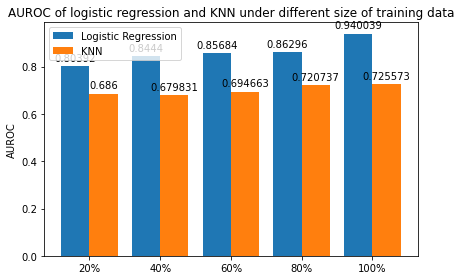

In [36]:
xlabels = ['20%', '40%', '60%', '80%', '100%']
fig, ax = plt.subplots()
ind = np.arange(5)
width = 0.40

rects1 = ax.bar(ind-0.2, size_auc_lr, width, label = "Logistic Regression")
rects2 = ax.bar(ind+0.2, size_auc_knn, width, label = "KNN")

ax.set_ylabel('AUROC')
ax.set_title('AUROC of logistic regression and KNN under different size of training data')
ax.set_xticks(ind, xlabels)
ax.legend()

ax.bar_label(rects1, padding=3)
ax.bar_label(rects2, padding=3)

fig.tight_layout()

plt.show()
plt.savefig("AUROC of LR and KNN.png", bbox_inches="tight", dpi=300)

### Creativity: try linear regression for predicting ratings in the IMDB data

In [495]:
model = LinearRegression().fit(x_train, y_train)

# Obtain the coefficient of determination by calling the model with the score() function, then print the coefficient:
coef = model.score(x_train, y_train)
print('coefficient of determination:', coef)

# Print the Intercept:
print('intercept:', model.intercept_)

# Print the Slope:
print('slope:', model.coef_) 

# Check the accuracy
acc = accuracy_score(y_test, y_pred2)
print("The accuracy of linear regression is: ", acc)

coefficient of determination: 0.5417175154126528
intercept: [0.26919556 0.25183105 0.24326912 0.23527511]
slope: [[ 2.66787277  0.06353115  1.4389888  ... -0.29240113 -0.22509211
   0.42816863]
 [-1.36789717  0.4984728  -0.29153515 ... -0.03558994 -0.10732702
  -0.26939466]
 [-0.75946685 -0.08220211 -0.89319259 ...  0.37549097  0.08559092
  -0.50223552]
 [-0.54050875 -0.47911616 -0.25499279 ... -0.04825565  0.24694614
   0.34389665]]
The accuracy of linear regression is:  0.47534766118836913


## NewGroupsData

### import the dataset 

In [459]:
categories = ['rec.sport.hockey', 'soc.religion.christian', 'comp.graphics', 'sci.med']
twenty_train = fetch_20newsgroups(subset='train', categories=categories, shuffle=True, random_state=42, remove=(['headers', 'footers', 'quotes']))
testing = fetch_20newsgroups(subset='test', categories=categories, shuffle=True, random_state=42, remove=(['headers', 'footers', 'quotes']))

In [460]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer


lb = preprocessing.LabelBinarizer()
y_bi = lb.fit_transform(twenty_train.target)

count_vect = CountVectorizer()
X_train_counts = count_vect.fit_transform(twenty_train.data)

twenty_x_train=X_train_counts.toarray()

In [461]:
n_zeros2 = np.count_nonzero(twenty_x_train==0, axis=0)

fr_zeros2 = n_zeros2/len(twenty_train.data)
print(fr_zeros2)
fr_zeros2 = 1-fr_zeros2
print(fr_zeros2)

[0.97980648 0.98485486 0.9995793  ... 0.9995793  0.9995793  0.9995793 ]
[0.02019352 0.01514514 0.0004207  ... 0.0004207  0.0004207  0.0004207 ]


#### remove stop words 

In [462]:
preserve = []
for i in range(0,28864):
    frequency = fr_zeros2[i]
    if frequency >= 0.01 and frequency <= 0.50 :
        preserve.append(i)

In [463]:
length=len(preserve)
length

1464

#### calculate mutual information 

In [464]:
from sklearn.metrics.cluster import adjusted_mutual_info_score

mi_value = np.zeros((length,4))
for i in range(0,length):
    ind = preserve[i]
    for j in range(0,4):
        u = twenty_x_train[:,ind]
        v = y_bi[:,j]
        mi_value[i,j] = adjusted_mutual_info_score(u,v)   

In [465]:

pre2 = []
five_features = []
for label in range(0,4):
    five_ind = np.argpartition((mi_value[:,label]), -5)[-5:]
    for index in five_ind:
        five_features.append(preserve[index])
    
    pre_ind = np.argpartition((mi_value[:,label]), -100)[-100:]
    for index in pre_ind:
        pre2.append(preserve[index])
pre2 = np.unique(pre2)

In [466]:
len(pre2)

322

In [467]:
X_test_counts = count_vect.transform(testing.data)

x_test1=X_test_counts.toarray()

# leng_train = twenty_x_train.shape[1]
# n_test,leng_test = x_test1.shape
# x_test_new = np.zeros((n_test,leng_train)).astype(int)
# x_test_new[:,:leng_test] = x_test1
# x_testing = x_test_new[:,pre2] # x test
x_testing = x_test1[:,pre2] # x test

y_test = lb.fit_transform(testing.target) # y test

x_pre_c = twenty_x_train[:,pre2] # x train


### Construct Multiclass logistics

In [468]:
class Multinomial_logistic:
    def __init__(self, nFeatures, nClasses):
        self.W = np.random.rand(nFeatures, nClasses)

    def predict(self, X):
        max_temp = np.amax(np.matmul(X, self.W),axis=1)
        m_new = (np.matmul(X, self.W).transpose() - max_temp).transpose()
        y_pred = np.exp(m_new)
        return y_pred / y_pred.sum(axis=1).reshape(X.shape[0], 1)

    def grad(self, X, y):
        return np.matmul(X.transpose(), self.predict(X) - y)

    def ce(self, X, y):
        return -np.sum(y * np.log(self.predict(X)))

    # modify it to add stopping criteria (what can you think of?)
    def fit(self, X, y, X_valid=None, y_valid=None, lr=0.005, niter=100):
        losses_train = np.zeros(niter)
        losses_valid = np.zeros(niter)
        for i in range(niter):
            self.W = self.W - lr * self.grad(X, y)
            loss_train = self.ce(X, y)
            losses_train[i] = loss_train
            if X_valid is not None and y_valid is not None:
                loss_valid = self.ce(X_valid, y_valid)
                losses_valid[i] = loss_valid
                print(f"iter {i}: {loss_train:.3f}; {loss_valid:.3f}")
            else:
                print(f"iter {i}: {loss_train:.3f}")
        return losses_train, losses_valid

    def check_grad(self, X, y):
        N, C = y.shape
        D = X.shape[1]

        diff = np.zeros((D, C))

        W = self.W.copy()

        for i in range(D):
            for j in range(C):
                epsilon = np.zeros((D, C))
                epsilon[i, j] = np.random.rand() * 1e-4

                self.W = self.W + epsilon
                J1 = self.ce(X, y)
                self.W = W

                self.W = self.W - epsilon
                J2 = self.ce(X, y)
                self.W = W

                numeric_grad = (J1 - J2) / (2 * epsilon[i, j])
                derived_grad = self.grad(X, y)[i, j]

                diff[i, j] = np.square(derived_grad - numeric_grad).sum() / \
                             np.square(derived_grad + numeric_grad).sum()

        # print(diff)
        return diff.sum()

In [469]:
def evaluate(y, y_pred):
    accuracy = sum(y_pred.argmax(axis=1) == y.argmax(axis=1))
    accuracy = accuracy / y.shape[0]
    return accuracy

#### Standardize datasets 

In [470]:


random.seed(551)
mm_scaler = preprocessing.MinMaxScaler()

x_train, x_valid, y_train, y_valid = model_selection.train_test_split(
    x_pre_c, y_bi, test_size = 0.5, random_state=1, shuffle=True)

x_train = mm_scaler.fit_transform(x_train)
x_valid = mm_scaler.fit_transform(x_valid)
x_test = mm_scaler.fit_transform(x_testing)

In [471]:
y_train.shape

(1188, 4)

In [472]:
x_train.shape

(1188, 322)

In [473]:
N, C = y_train.shape
D = x_train.shape[1]

mlr = Multinomial_logistic(D, C)

In [474]:
y_train.shape

(1188, 4)

In [475]:
x_train.shape

(1188, 322)

#### Gradient descent

In [476]:
# check grad
print(mlr.check_grad(x_train, y_train))

3.0542894908782824e-12


In [477]:
ce_train, ce_valid = mlr.fit(x_train, y_train, x_valid, y_valid, niter=1000)
optimal_niter = ce_valid.argmin()

iter 0: 1582.311; 1613.713
iter 1: 1532.676; 1553.704
iter 2: 1497.835; 1514.082
iter 3: 1468.928; 1482.054
iter 4: 1443.716; 1454.554
iter 5: 1421.127; 1430.218
iter 6: 1400.549; 1408.282
iter 7: 1381.596; 1388.269
iter 8: 1364.007; 1369.848
iter 9: 1347.592; 1352.782
iter 10: 1332.205; 1336.887
iter 11: 1317.731; 1322.019
iter 12: 1304.078; 1308.060
iter 13: 1291.167; 1294.914
iter 14: 1278.930; 1282.499
iter 15: 1267.309; 1270.746
iter 16: 1256.254; 1259.595
iter 17: 1245.718; 1248.993
iter 18: 1235.660; 1238.894
iter 19: 1226.045; 1229.259
iter 20: 1216.839; 1220.052
iter 21: 1208.012; 1211.239
iter 22: 1199.539; 1202.792
iter 23: 1191.394; 1194.686
iter 24: 1183.557; 1186.897
iter 25: 1176.006; 1179.403
iter 26: 1168.723; 1172.186
iter 27: 1161.693; 1165.228
iter 28: 1154.899; 1158.513
iter 29: 1148.329; 1152.027
iter 30: 1141.968; 1145.757
iter 31: 1135.806; 1139.689
iter 32: 1129.831; 1133.813
iter 33: 1124.033; 1128.118
iter 34: 1118.404; 1122.595
iter 35: 1112.934; 1117.236
it

iter 323: 729.842; 775.387
iter 324: 729.387; 775.044
iter 325: 728.935; 774.703
iter 326: 728.484; 774.364
iter 327: 728.034; 774.026
iter 328: 727.586; 773.689
iter 329: 727.140; 773.353
iter 330: 726.696; 773.019
iter 331: 726.252; 772.687
iter 332: 725.811; 772.355
iter 333: 725.371; 772.025
iter 334: 724.932; 771.696
iter 335: 724.495; 771.369
iter 336: 724.060; 771.042
iter 337: 723.625; 770.717
iter 338: 723.193; 770.394
iter 339: 722.762; 770.071
iter 340: 722.332; 769.750
iter 341: 721.904; 769.430
iter 342: 721.477; 769.112
iter 343: 721.052; 768.794
iter 344: 720.628; 768.478
iter 345: 720.206; 768.163
iter 346: 719.785; 767.849
iter 347: 719.365; 767.537
iter 348: 718.947; 767.225
iter 349: 718.530; 766.915
iter 350: 718.114; 766.606
iter 351: 717.700; 766.298
iter 352: 717.287; 765.991
iter 353: 716.876; 765.686
iter 354: 716.466; 765.381
iter 355: 716.057; 765.078
iter 356: 715.650; 764.776
iter 357: 715.244; 764.475
iter 358: 714.839; 764.175
iter 359: 714.435; 763.876
i

iter 677: 626.859; 702.376
iter 678: 626.664; 702.247
iter 679: 626.470; 702.118
iter 680: 626.276; 701.989
iter 681: 626.083; 701.861
iter 682: 625.890; 701.733
iter 683: 625.697; 701.605
iter 684: 625.504; 701.478
iter 685: 625.312; 701.351
iter 686: 625.120; 701.223
iter 687: 624.929; 701.097
iter 688: 624.738; 700.970
iter 689: 624.547; 700.844
iter 690: 624.356; 700.718
iter 691: 624.166; 700.592
iter 692: 623.976; 700.466
iter 693: 623.786; 700.341
iter 694: 623.597; 700.216
iter 695: 623.408; 700.091
iter 696: 623.219; 699.966
iter 697: 623.031; 699.842
iter 698: 622.843; 699.718
iter 699: 622.655; 699.594
iter 700: 622.468; 699.470
iter 701: 622.281; 699.347
iter 702: 622.094; 699.223
iter 703: 621.907; 699.100
iter 704: 621.721; 698.977
iter 705: 621.535; 698.855
iter 706: 621.350; 698.732
iter 707: 621.164; 698.610
iter 708: 620.979; 698.488
iter 709: 620.795; 698.367
iter 710: 620.610; 698.245
iter 711: 620.426; 698.124
iter 712: 620.242; 698.003
iter 713: 620.059; 697.882
i

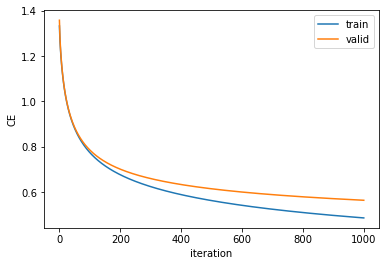

In [478]:
plt.clf()
plt.plot(ce_train/x_train.shape[0], label='train')
plt.plot(ce_valid/x_valid.shape[0], label='valid')
plt.xlabel("iteration")
plt.ylabel("CE")
plt.legend()
# plt.show()
plt.savefig("training_ce.png", bbox_inches="tight", dpi=300)

In [479]:
mlr = Multinomial_logistic(D, C)
optimal_niter = ce_valid.argmin()
_, _ = mlr.fit(x_train, y_train, niter=optimal_niter)

iter 0: 1641.030
iter 1: 1589.008
iter 2: 1546.785
iter 3: 1510.916
iter 4: 1480.193
iter 5: 1453.749
iter 6: 1430.363
iter 7: 1409.201
iter 8: 1389.795
iter 9: 1371.850
iter 10: 1355.152
iter 11: 1339.539
iter 12: 1324.881
iter 13: 1311.071
iter 14: 1298.020
iter 15: 1285.654
iter 16: 1273.907
iter 17: 1262.726
iter 18: 1252.061
iter 19: 1241.872
iter 20: 1232.121
iter 21: 1222.776
iter 22: 1213.808
iter 23: 1205.190
iter 24: 1196.900
iter 25: 1188.916
iter 26: 1181.219
iter 27: 1173.791
iter 28: 1166.616
iter 29: 1159.680
iter 30: 1152.969
iter 31: 1146.471
iter 32: 1140.175
iter 33: 1134.069
iter 34: 1128.144
iter 35: 1122.391
iter 36: 1116.801
iter 37: 1111.367
iter 38: 1106.081
iter 39: 1100.935
iter 40: 1095.925
iter 41: 1091.043
iter 42: 1086.283
iter 43: 1081.642
iter 44: 1077.112
iter 45: 1072.691
iter 46: 1068.373
iter 47: 1064.154
iter 48: 1060.030
iter 49: 1055.998
iter 50: 1052.054
iter 51: 1048.194
iter 52: 1044.416
iter 53: 1040.716
iter 54: 1037.091
iter 55: 1033.540
it

iter 572: 649.176
iter 573: 648.939
iter 574: 648.703
iter 575: 648.467
iter 576: 648.231
iter 577: 647.996
iter 578: 647.762
iter 579: 647.528
iter 580: 647.294
iter 581: 647.061
iter 582: 646.828
iter 583: 646.596
iter 584: 646.364
iter 585: 646.132
iter 586: 645.901
iter 587: 645.671
iter 588: 645.441
iter 589: 645.211
iter 590: 644.982
iter 591: 644.754
iter 592: 644.525
iter 593: 644.298
iter 594: 644.070
iter 595: 643.843
iter 596: 643.617
iter 597: 643.391
iter 598: 643.165
iter 599: 642.940
iter 600: 642.716
iter 601: 642.491
iter 602: 642.268
iter 603: 642.044
iter 604: 641.821
iter 605: 641.599
iter 606: 641.376
iter 607: 641.155
iter 608: 640.933
iter 609: 640.713
iter 610: 640.492
iter 611: 640.272
iter 612: 640.052
iter 613: 639.833
iter 614: 639.614
iter 615: 639.396
iter 616: 639.178
iter 617: 638.961
iter 618: 638.743
iter 619: 638.527
iter 620: 638.310
iter 621: 638.094
iter 622: 637.879
iter 623: 637.664
iter 624: 637.449
iter 625: 637.235
iter 626: 637.021
iter 627: 

In [480]:
train_accuracy = evaluate(mlr.predict(x_train), y_train)
valid_accuracy = evaluate(mlr.predict(x_valid), y_valid)
test_accuracy = evaluate(mlr.predict(x_test), y_test)

print(train_accuracy)
print(valid_accuracy)
print(test_accuracy)

0.8627946127946128
0.8292682926829268
0.7781289506953224


#### HeatMap

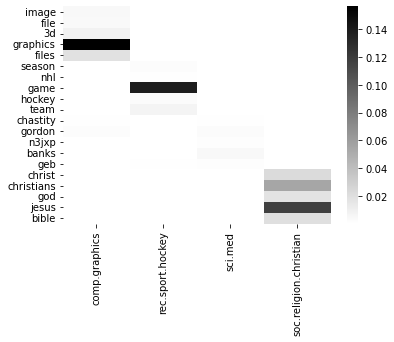

In [481]:
from seaborn import heatmap

W_hat = mlr.W
W_hat_transformed = np.exp(W_hat)
W_hat_transformed = W_hat_transformed / W_hat_transformed.sum(axis=0)[None,:]

wht = np.zeros((1,4))
feature_names = []
for index in five_features:
    f_name = count_vect.get_feature_names_out()[index]
    feature_names.append(f_name)
    for i in range (0, len(pre2)):
        if pre2[i] == index:
            wht = np.vstack([wht, W_hat_transformed[i,:]])
            break
wht = wht[1:,:]

label_names = ['comp.graphics','rec.sport.hockey', 'sci.med', 'soc.religion.christian']
W_hat_transformed_df = pd.DataFrame(wht, columns=label_names, index=feature_names)
hmp = heatmap(W_hat_transformed_df, cmap='gray_r')
fig = hmp.get_figure()
fig.savefig("heatmap.png", bbox_inches="tight", dpi=300)

#### KNN Classification

In [482]:
from sklearn import neighbors
from sklearn.neighbors import KNeighborsClassifier

knn_x = mm_scaler.fit_transform(x_pre_c)
trained_model=neighbors.KNeighborsClassifier(n_neighbors=10,metric='euclidean').fit(knn_x,y_bi)

y_pred2=trained_model.predict(x_test)
knn_test_accuracy=accuracy_score(y_test, y_pred2)
print(knn_test_accuracy)

0.47534766118836913


#### Model Accuracy with different size

In [67]:
x_test.shape

(1582, 322)

In [68]:
from sklearn import neighbors
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score



sizelist = [0.2,0.4,0.6,0.8]
size_acc = []
knn_acc = []
for s in sizelist:
    x_train_new, _, y_train_new, _ = model_selection.train_test_split(
    x_pre_c, y_bi, train_size = s, random_state=1, shuffle=True)
    
    x_train_new = mm_scaler.fit_transform(x_train_new)
    
    mlr.fit(x_train_new, y_train_new, niter=optimal_niter)
    test_accuracy = evaluate(mlr.predict(x_test), y_test)
    size_acc.append(test_accuracy)
    
    trained_model = neighbors.KNeighborsClassifier(n_neighbors=10,metric='euclidean').fit(x_train_new,y_train_new)
    print(x_train.shape)
    print(x_test.shape)
    y_pred2 = trained_model.predict(x_test)
    knn_test_acc = accuracy_score(y_test, y_pred2)
    knn_acc.append(knn_test_acc)
    

iter 0: 225.045
iter 1: 224.386
iter 2: 223.748
iter 3: 223.130
iter 4: 222.531
iter 5: 221.951
iter 6: 221.390
iter 7: 220.847
iter 8: 220.321
iter 9: 219.812
iter 10: 219.318
iter 11: 218.841
iter 12: 218.378
iter 13: 217.930
iter 14: 217.495
iter 15: 217.073
iter 16: 216.665
iter 17: 216.268
iter 18: 215.884
iter 19: 215.510
iter 20: 215.147
iter 21: 214.795
iter 22: 214.452
iter 23: 214.118
iter 24: 213.794
iter 25: 213.478
iter 26: 213.170
iter 27: 212.870
iter 28: 212.578
iter 29: 212.293
iter 30: 212.014
iter 31: 211.742
iter 32: 211.476
iter 33: 211.216
iter 34: 210.962
iter 35: 210.713
iter 36: 210.470
iter 37: 210.231
iter 38: 209.997
iter 39: 209.767
iter 40: 209.542
iter 41: 209.321
iter 42: 209.104
iter 43: 208.890
iter 44: 208.681
iter 45: 208.474
iter 46: 208.271
iter 47: 208.072
iter 48: 207.875
iter 49: 207.681
iter 50: 207.490
iter 51: 207.302
iter 52: 207.117
iter 53: 206.934
iter 54: 206.753
iter 55: 206.575
iter 56: 206.399
iter 57: 206.225
iter 58: 206.054
iter 59

iter 535: 176.509
iter 536: 176.477
iter 537: 176.445
iter 538: 176.413
iter 539: 176.381
iter 540: 176.350
iter 541: 176.318
iter 542: 176.286
iter 543: 176.254
iter 544: 176.223
iter 545: 176.191
iter 546: 176.160
iter 547: 176.128
iter 548: 176.097
iter 549: 176.065
iter 550: 176.034
iter 551: 176.002
iter 552: 175.971
iter 553: 175.940
iter 554: 175.909
iter 555: 175.877
iter 556: 175.846
iter 557: 175.815
iter 558: 175.784
iter 559: 175.753
iter 560: 175.722
iter 561: 175.691
iter 562: 175.660
iter 563: 175.629
iter 564: 175.598
iter 565: 175.568
iter 566: 175.537
iter 567: 175.506
iter 568: 175.475
iter 569: 175.445
iter 570: 175.414
iter 571: 175.384
iter 572: 175.353
iter 573: 175.323
iter 574: 175.292
iter 575: 175.262
iter 576: 175.231
iter 577: 175.201
iter 578: 175.171
iter 579: 175.140
iter 580: 175.110
iter 581: 175.080
iter 582: 175.050
iter 583: 175.020
iter 584: 174.990
iter 585: 174.960
iter 586: 174.930
iter 587: 174.900
iter 588: 174.870
iter 589: 174.840
iter 590: 

iter 0: 437.085
iter 1: 436.840
iter 2: 436.598
iter 3: 436.358
iter 4: 436.121
iter 5: 435.886
iter 6: 435.653
iter 7: 435.422
iter 8: 435.193
iter 9: 434.967
iter 10: 434.742
iter 11: 434.520
iter 12: 434.299
iter 13: 434.080
iter 14: 433.864
iter 15: 433.649
iter 16: 433.436
iter 17: 433.224
iter 18: 433.015
iter 19: 432.807
iter 20: 432.601
iter 21: 432.396
iter 22: 432.193
iter 23: 431.992
iter 24: 431.792
iter 25: 431.594
iter 26: 431.398
iter 27: 431.203
iter 28: 431.009
iter 29: 430.817
iter 30: 430.626
iter 31: 430.436
iter 32: 430.248
iter 33: 430.062
iter 34: 429.876
iter 35: 429.692
iter 36: 429.509
iter 37: 429.328
iter 38: 429.147
iter 39: 428.968
iter 40: 428.790
iter 41: 428.613
iter 42: 428.438
iter 43: 428.263
iter 44: 428.090
iter 45: 427.918
iter 46: 427.747
iter 47: 427.577
iter 48: 427.408
iter 49: 427.240
iter 50: 427.073
iter 51: 426.907
iter 52: 426.742
iter 53: 426.578
iter 54: 426.415
iter 55: 426.253
iter 56: 426.092
iter 57: 425.932
iter 58: 425.773
iter 59

iter 645: 382.353
iter 646: 382.311
iter 647: 382.269
iter 648: 382.227
iter 649: 382.185
iter 650: 382.143
iter 651: 382.101
iter 652: 382.059
iter 653: 382.017
iter 654: 381.975
iter 655: 381.934
iter 656: 381.892
iter 657: 381.850
iter 658: 381.809
iter 659: 381.767
iter 660: 381.725
iter 661: 381.684
iter 662: 381.642
iter 663: 381.601
iter 664: 381.559
iter 665: 381.518
iter 666: 381.476
iter 667: 381.435
iter 668: 381.393
iter 669: 381.352
iter 670: 381.311
iter 671: 381.269
iter 672: 381.228
iter 673: 381.187
iter 674: 381.146
iter 675: 381.104
iter 676: 381.063
iter 677: 381.022
iter 678: 380.981
iter 679: 380.940
iter 680: 380.899
iter 681: 380.858
iter 682: 380.817
iter 683: 380.776
iter 684: 380.735
iter 685: 380.694
iter 686: 380.653
iter 687: 380.612
iter 688: 380.571
iter 689: 380.531
iter 690: 380.490
iter 691: 380.449
iter 692: 380.408
iter 693: 380.368
iter 694: 380.327
iter 695: 380.286
iter 696: 380.246
iter 697: 380.205
iter 698: 380.165
iter 699: 380.124
iter 700: 

iter 263: 611.600
iter 264: 611.485
iter 265: 611.370
iter 266: 611.255
iter 267: 611.141
iter 268: 611.027
iter 269: 610.913
iter 270: 610.799
iter 271: 610.686
iter 272: 610.573
iter 273: 610.460
iter 274: 610.348
iter 275: 610.236
iter 276: 610.124
iter 277: 610.012
iter 278: 609.901
iter 279: 609.790
iter 280: 609.679
iter 281: 609.568
iter 282: 609.458
iter 283: 609.348
iter 284: 609.238
iter 285: 609.129
iter 286: 609.020
iter 287: 608.911
iter 288: 608.802
iter 289: 608.694
iter 290: 608.586
iter 291: 608.478
iter 292: 608.371
iter 293: 608.264
iter 294: 608.157
iter 295: 608.050
iter 296: 607.944
iter 297: 607.838
iter 298: 607.732
iter 299: 607.626
iter 300: 607.521
iter 301: 607.416
iter 302: 607.312
iter 303: 607.207
iter 304: 607.103
iter 305: 606.999
iter 306: 606.896
iter 307: 606.792
iter 308: 606.690
iter 309: 606.587
iter 310: 606.484
iter 311: 606.382
iter 312: 606.280
iter 313: 606.179
iter 314: 606.078
iter 315: 605.976
iter 316: 605.876
iter 317: 605.775
iter 318: 

iter 933: 563.847
iter 934: 563.795
iter 935: 563.743
iter 936: 563.691
iter 937: 563.639
iter 938: 563.588
iter 939: 563.536
iter 940: 563.484
iter 941: 563.433
iter 942: 563.381
iter 943: 563.329
iter 944: 563.278
iter 945: 563.226
iter 946: 563.175
iter 947: 563.123
iter 948: 563.072
iter 949: 563.020
iter 950: 562.969
iter 951: 562.918
iter 952: 562.866
iter 953: 562.815
iter 954: 562.764
iter 955: 562.713
iter 956: 562.661
iter 957: 562.610
iter 958: 562.559
iter 959: 562.508
iter 960: 562.457
iter 961: 562.406
iter 962: 562.355
iter 963: 562.304
iter 964: 562.253
iter 965: 562.202
iter 966: 562.151
iter 967: 562.100
iter 968: 562.050
iter 969: 561.999
iter 970: 561.948
iter 971: 561.897
iter 972: 561.847
iter 973: 561.796
iter 974: 561.745
iter 975: 561.695
iter 976: 561.644
iter 977: 561.594
iter 978: 561.543
iter 979: 561.493
iter 980: 561.442
iter 981: 561.392
iter 982: 561.342
iter 983: 561.291
iter 984: 561.241
iter 985: 561.191
iter 986: 561.140
iter 987: 561.090
iter 988: 

iter 587: 778.717
iter 588: 778.636
iter 589: 778.556
iter 590: 778.475
iter 591: 778.395
iter 592: 778.314
iter 593: 778.234
iter 594: 778.154
iter 595: 778.074
iter 596: 777.994
iter 597: 777.914
iter 598: 777.834
iter 599: 777.754
iter 600: 777.674
iter 601: 777.594
iter 602: 777.515
iter 603: 777.435
iter 604: 777.356
iter 605: 777.276
iter 606: 777.197
iter 607: 777.118
iter 608: 777.038
iter 609: 776.959
iter 610: 776.880
iter 611: 776.801
iter 612: 776.722
iter 613: 776.643
iter 614: 776.565
iter 615: 776.486
iter 616: 776.407
iter 617: 776.329
iter 618: 776.250
iter 619: 776.172
iter 620: 776.093
iter 621: 776.015
iter 622: 775.937
iter 623: 775.859
iter 624: 775.781
iter 625: 775.703
iter 626: 775.625
iter 627: 775.547
iter 628: 775.469
iter 629: 775.391
iter 630: 775.313
iter 631: 775.236
iter 632: 775.158
iter 633: 775.081
iter 634: 775.003
iter 635: 774.926
iter 636: 774.849
iter 637: 774.771
iter 638: 774.694
iter 639: 774.617
iter 640: 774.540
iter 641: 774.463
iter 642: 

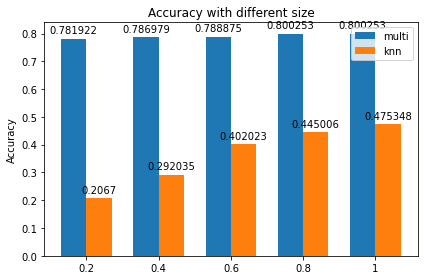

In [69]:
sizelist.append(1)
size_acc.append(test_accuracy)
knn_acc.append(knn_test_accuracy)

x = np.arange(len(sizelist))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, size_acc, width, label='multi')
rects2 = ax.bar(x + width/2, knn_acc, width, label='knn')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Accuracy')
ax.set_title('Accuracy with different size')
ax.set_xticks(x, sizelist)
ax.legend()

ax.bar_label(rects1, padding=3)
ax.bar_label(rects2, padding=3)

fig.tight_layout()

plt.show()
plt.savefig("Acc of different size", bbox_inches="tight", dpi=300)